# 고전적 랜덤워크
- dt 내에서 움직일 확률은 dt (포아송 분포)
- 왼쪽, 오른쪽 1/2 확률로 이동할 수 있음
- $ H=blablabla $로 정의하면
- t+dt 일 때 분포는 $ P_{t+dt} = dt HP_{t} + (1-dt)P_{t}$ 로 쓸 수 있음.
- 해를 구하면 $\frac{d}{dt} P_t = (H-I)P_t$

- $P_t(x)$를 푸리에 변환하면, 
$$P_t(x)=\frac{1}{2\pi} \int_{-\pi}^{\pi} \tilde{P_t}(k)e^{ikx}dk$$

- 초기에 0에 모든 확률이 집중되있었다면, 즉 $P_0(0) = 1$, $P_0(x) = 0 (x\neq0)$ 라면 $\tilde{P_0}(k) = 1$

- H의 고유벡터를 구하면 푸리에 기저벡터 $e^{ikx}$임. 이것을 $v_k$라고 하면, 
$$ Hv_k = \lambda_k v_k $$
- 또한 H의 정의상 임의의 벡터 $v$에 대해서 
$$ (Hv)_x = \frac{v_{x-1}+v_{x+1}}{2}$$
$$ \lambda_k = \frac{e^{-ik}+e^{ik}}{2} = \cos k$$
- $v_k$는 또한 $e^{(H-I)t}$의 고유벡터이므로
$$e^{(H-I)t}v_k = e^{(\lambda_k - 1)t}v_k$$
- 따라서
$$ P_t(x) = e^{(H-I)t}\frac{1}{2\pi} \int_{-\pi}^{\pi}e^{ikx}dk
= \frac{1}{1\pi}e^{(\cos{k} - 1)t}e^{ikx}dk$$
- t가 매우 크다고 가정하면 확률 분포는 점점 균일해질 것이므로 k 는 매우 작아질 것이다. 따라서 $\cos{k} = 1-k^2/2$로 근사
$$P_t(x) \simeq \frac{1}{2\pi}\int_{-\infty}^{\infty}e^{-tk^2/2}e^{ikx}dk = \frac{1}{\sqrt{2\pi t}}e^{-x^2 /(2t)}$$
- 분산 $t$, 가로 너비 $O(\sqrt{t})$인 **Gaussian Distribution** 을 따름
- 만약 길이가 n인 라인 그래프에서 각 정점을 균일하게 얻고 싶다면? 가로 너비가 $n=\sqrt{n^2}$가 되어야 하기 때문에 $O(n^2)$ 시간 소요됨.

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from ipywidgets import interact, IntSlider, FloatSlider
from IPython.display import display

# --- Initial Parameters ---
# 시뮬레이션 횟수를 약간 줄여서 인터랙티브 성능을 개선합니다.
num_trials = 50000 
lambda_rate = 1.0 # 람다 (점프율)
xmin, xmax = -60, 60
xs = np.arange(xmin, xmax+1)

# --- Simulation Function ---
def simulate_random_walk(t_max, num_trials, lambda_rate):
    """연속 시간 단순 대칭 랜덤 워크를 시뮬레이션합니다."""
    positions = []
    for _ in range(num_trials):
        x = 0
        time = 0.0
        while True:
            # 다음 점프까지 걸리는 시간 (평균 1/lambda_rate인 지수 분포)
            # np.random.exponential(scale=1/lambda_rate)
            dt = np.random.exponential(1/lambda_rate)
            if time + dt > t_max:
                break
            time += dt
            # 대칭 점프 (+1 또는 -1)
            x += 1 if np.random.rand() < 0.5 else -1
        positions.append(x)
    return positions

# --- Interactive Plotting Function ---
def plot_random_walk_distribution(t):
    """
    주어진 시간 t에 대해 랜덤 워크 분포를 시뮬레이션하고 플롯합니다.
    ipywidgets.interact에 의해 자동으로 호출됩니다.
    """
    if t <= 0:
        print("시간 (t)은 0보다 커야 합니다.")
        return
        
    # 1. 시뮬레이션
    positions = simulate_random_walk(t, num_trials, lambda_rate)

    # 2. 히스토그램 (정규화된 빈도)
    hist = np.zeros_like(xs, dtype=float)
    for p in positions:
        if xmin <= p <= xmax:
            hist[xs == p] += 1
    hist /= num_trials

    # 3. 가우시안 근사
    # 연속 시간 랜덤 워크의 분산은 일반적으로 t / lambda_rate 입니다.
    # 여기서는 lambda_rate=1이므로 분산은 t 입니다.
    sigma_squared = t / lambda_rate
    gaussian = (1/np.sqrt(2*np.pi*sigma_squared)) * np.exp(-(xs**2)/(2*sigma_squared))

    # 4. 플롯
    plt.figure(figsize=(10, 6))
    # 시뮬레이션 결과는 산점도로 표시
    plt.scatter(xs, hist, label=f'Random Walk (N={num_trials})', alpha=0.7)
    # 가우시안 근사는 선으로 표시
    plt.plot(xs, gaussian, color='red', label=f'Gaussian Approx ($\sigma^2={sigma_squared:.2f}$)', linewidth=2)
    plt.xlabel("위치 (x)")
    plt.ylabel("확률")
    plt.title(f"연속 시간 랜덤 워크 분포 vs 가우시안 (t = {t:.2f})")
    plt.xlim(xmin, xmax)
    plt.legend()
    plt.grid(True, linestyle='--', alpha=0.6)
    plt.show()

# --- Create Interactive Widget ---
# interact 함수를 사용하여 plot_random_walk_distribution 함수와 슬라이더를 연결합니다.
# t: FloatSlider(최소값, 최대값, 간격, 초기값, 설명)
interact(plot_random_walk_distribution, 
         t=FloatSlider(min=1.0, max=100.0, step=1.0, value=30.0, description='시간 (t):', 
                       readout_format='.1f'))

<>:63: SyntaxWarning: invalid escape sequence '\s'
<>:63: SyntaxWarning: invalid escape sequence '\s'
C:\Users\singrum\AppData\Local\Temp\ipykernel_21056\3402497605.py:63: SyntaxWarning: invalid escape sequence '\s'
  plt.plot(xs, gaussian, color='red', label=f'Gaussian Approx ($\sigma^2={sigma_squared:.2f}$)', linewidth=2)


interactive(children=(FloatSlider(value=30.0, description='시간 (t):', min=1.0, readout_format='.1f', step=1.0),…

<function __main__.plot_random_walk_distribution(t)>

# 양자 랜덤워크

유니터리 연산자 $U$의 고윳값의 크기는 1이므로 고유벡터는 $e^{i\theta}$ 형태임. 작은 $dt$에 대해서
$$e^{t\lambda dt} = 1+t\lambda dt$$
이고 이것을 어떤 확률 진폭 $\psi$에 적용하면
$$\psi_{t+dt} = \psi_t + i\lambda \psi_t dt$$
미분방정식으로 바꾸면
$$\frac{d}{dt}\psi_t = i\lambda \psi_t$$

U와 동일한 고유벡터를 가지며, 실수 고윳값 $\lambda$를 가지는 행렬 $H$를 가정하면
이 미분방정식은 
$$ \frac{d}{dt} \ket{\Psi_t} = iH\ket{\Psi_t}$$
가 되며 이것을 풀면
$$ \ket{\Psi_t} = e^{iHt}\ket{\Psi_0}$$
이다.

H는 양자역학에 나오는 그 해밀토니안이다. 그런데 여기서는 위에서 본 H와 같은 **라인 그래프의 인접 행렬**로 취급된다. 

$\Psi_t$를 절댓값 제곱하면 확률 분포가 된다는 것을 알고 있다. t초 후 확률 분포를 구하기 위해 앞서 고전적 랜덤워크와 같은 방법을 사용하자.

푸리에 기저로 변환하면,
$$\Psi_t(x) = \frac{1}{2\pi}\int_{-\pi}^{\pi}\tilde{\Psi_t}(k)e^{ikx}dk$$
$$\Psi_t(x) = \frac{1}{2\pi}\int_{-\pi}^{\pi}e^{i\lambda t}e^{ikx}dk = \frac{1}{2\pi}\int_{-\pi}^{\pi}e^{it\cos k}e^{ikx} dk$$

$$ P_t(x) = |\Psi_t(x)|^2 ~ \frac{1}{\sqrt{t^2 - x^2}}$$
이 분포는 $t$초 후에 $[-t, t]$의 너비로 균일하게 분포하게 된다.
따라서 크기가 $n$인 라인그래프에서 균일한 분포를 얻기 위해서 $\Theta(n)$의 시간이 소요된다





Font 'default' does not have a glyph for '\uc5d0' [U+c5d0], substituting with a dummy symbol.
Font 'default' does not have a glyph for '\uc11c' [U+c11c], substituting with a dummy symbol.
Font 'default' does not have a glyph for '\uc758' [U+c758], substituting with a dummy symbol.
Font 'default' does not have a glyph for '\ud06c' [U+d06c], substituting with a dummy symbol.
Font 'default' does not have a glyph for '\uae30' [U+ae30], substituting with a dummy symbol.
Font 'default' does not have a glyph for '\ubcc0' [U+bcc0], substituting with a dummy symbol.
Font 'default' does not have a glyph for '\ud654' [U+d654], substituting with a dummy symbol.
Font 'default' does not have a glyph for '\uc5d0' [U+c5d0], substituting with a dummy symbol.
Font 'default' does not have a glyph for '\uc11c' [U+c11c], substituting with a dummy symbol.
Font 'default' does not have a glyph for '\uc758' [U+c758], substituting with a dummy symbol.
Font 'default' does not have a glyph for '\ud06c' [U+d06c], 

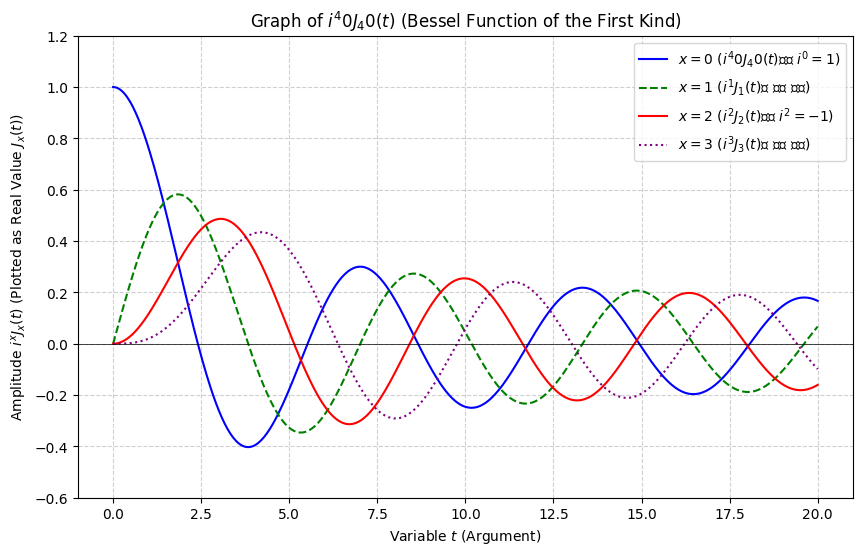

In [14]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.special import jv  # SciPy의 베셀 함수 (J_x(t)) 모듈

# --- 1. 변수 t 범위 설정 ---
# t는 베셀 함수의 독립 변수입니다 (문제의 식에서는 진폭의 역할).
t_min = 0.0
t_max = 20.0
t = np.linspace(t_min, t_max, 500)

# --- 2. 그래프 그리기 ---
plt.figure(figsize=(10, 6))

# 여러 차수(x)에 대한 베셀 함수를 그립니다.
# x=0, 1, 2, 3인 경우를 예시로 듭니다.

# x=0: J_0(t)
x0 = 0
J0_t = jv(x0, t)
plt.plot(t, J0_t, label=f'$x={x0}$ ($i^{x}J_{x}(t)$에서 $i^{0}=1$)', color='blue')

# x=1: J_1(t)
x1 = 1
J1_t = jv(x1, t)
# 문제의 함수 f(t, x)는 i^x * J_x(t) 입니다. x=1일 때 i^1 = i 이므로,
# 실제 함수는 허수가 되어 복소 평면에 그려야 합니다.
# 여기서는 실수부(Real Part)의 크기 변화를 보기 위해 J_1(t) 자체를 그립니다.
plt.plot(t, J1_t, label=f'$x={x1}$ ($i^{1}J_{1}(t)$의 크기 변화)', color='green', linestyle='--')

# x=2: J_2(t)
x2 = 2
J2_t = jv(x2, t)
plt.plot(t, J2_t, label=f'$x={x2}$ ($i^{2}J_{2}(t)$에서 $i^{2}=-1$)', color='red')

# x=3: J_3(t)
x3 = 3
J3_t = jv(x3, t)
plt.plot(t, J3_t, label=f'$x={x3}$ ($i^{3}J_{3}(t)$의 크기 변화)', color='purple', linestyle=':')


# --- 3. 그래프 설정 ---
plt.title(f'Graph of $i^{x}J_{x}(t)$ (Bessel Function of the First Kind)')
plt.xlabel('Variable $t$ (Argument)')
plt.ylabel('Amplitude $i^{x}J_{x}(t)$ (Plotted as Real Value $J_{x}(t)$)')
plt.axhline(0, color='black', linewidth=0.5) # x축
plt.legend()
plt.grid(True, linestyle='--', alpha=0.6)
plt.ylim(-0.6, 1.2)
plt.show()

# 루프가 포함된 라인 그래프
라인그래프에서 원점에 루프를 하나 첨가해보자. 그럼 H는 다음과 같이 변할 것이다.
$$ H = blablabla $$
루프가 없었을 때는 한 고윳값 $\lambda = \cos{k}$ 에 대해서 두 고유벡터 $e^{ikx}$와 $e^{-ikx}$가 존재한다. 이 두 벡터는 오른쪽으로 가는 파동과 왼쪽으로 가는 파동을 의미한다.
루프가 포함된 그래프에서
$$ v(x) = \begin{cases} e^{ikx} + Re^{-ikx} & (x\leq 0) \\ Te^{ikx} &(x\ge 0) \end{cases} $$
로 두고, 이것이 H의 고유 벡터라고 가정하자.

0에서 연속성을 가정하면
$$R=T-1$$
이다.
$Hv=\lambda v$에 대입하면
$$\alpha v(0) +\frac{v(1)+v(-1)}{2} = \lambda v(0)$$

따라서 v(x)를 대입하면
$$ \alpha T + Te^{ik} - i\sin{k} = T\cos {k}$$
$T$에 대해 정리하면
$$ T = \frac{1}{1-i\alpha / \sin{k}}$$
$$ |T|^2 = \frac{1}{1+\alpha^2/\sin^2{k}}$$

$\alpha$가 커지면 반사되는 파동이 커지고, 투과 되는 파동이 작아지는 것을 볼 수 있다.



# tadpole이 포함된 라인 그래프
루프를 추가하는 대신, 하나의 엣지를 첨가하고, 그 끝에 루프를 넣어보자. 엣지의 가중치를 $\beta$라고 하고, 루프의 가중치를 $\alpha$라고 한 후 $Hv=\lambda v$를 풀면,
$$\alpha v(u) + \beta v(0) = \lambda v(u)$$
$$\beta v(u) + \frac{v(1) + v(-1)}{2} = \lambda v(0) $$
$v(u)$를 소거하면,
$$ \frac{\beta^2}{\lambda - \alpha}v(0) + \frac{v(1)+v(-1)}{2} = \lambda v(0)$$
그런데 이것은 앞서 본 루프만 있는 그래프에서 $\alpha$가 $\frac{\beta^2}{\lambda - \alpha}$인 경우와 같다.  
즉 우리는 하나의 엣지와 루프로 이루어진 그래프를 루프 하나로 압축시킬 수 있게 된다.

그렇다면 0 정점에서 두 개의 tadpole이 존재하는 경우는 어떨까? 이때는 
$$\alpha' = \frac{1}{\lambda - \alpha_1} + \frac{1}{\lambda - \alpha_2}$$
를 가중치로 갖는 루프가 된다.

$ \lambda $를 0으로 설정하면, 
$$\alpha' = -\frac{1}{\alpha_1} - \frac{1}{\alpha_2}$$
이다. 
만약 $\alpha_1$ 또는 $\alpha_2$가 0이라면 $\alpha'$는 무한대가 되고, $\alpha_1$과 $\alpha_2$ 둘 다 무한대라면 $\alpha'$는 0이 된다.
무한대는 true, 0은 false를 의미한다고 가정하면, $\alpha'$는 $\neg(\alpha_1 \wedge \alpha_2)$가 된다. 즉 $\alpha_1$와 $\alpha_2$의 NAND게이트 역할을 한다.
이것은 분기, 엣지 추가를 더 많이 해도 똑같이 성립하는데, 그렇게 만들어진 그래프를 트리라고 한다. 트리의 가장 끝부분, 즉 leaf의 $\alpha$값을 0 (false)로 설정하고 이 트리를 전부 압축한 결과 뿌리에서의 $\alpha$값은, 그 NAND 트리를 계산한 결과와 같다.


# 파동 패킷을 이용한 구현
무한한 라인 그래프는 상태가 무한히 많다는 의미인데 이것은 실제로 불가능하다. (큐빗의 크기 자체가 유한함) 그러기 위해서 wave packet을 써야 하는데, 불확정성 원리에 따르면 wave packet의 폭은 푸리에 기저 내에서 주파수의 분포 폭에 반비례한다. 따라서 wave packet의 폭과 알고리즘의 수행 시간은 트리를 축약했을 때 true와 false에 대해 분명하게 다른 $\alpha$값을 주는 $|\lambda|$에 반비례한다.

그렇다면 이 $|\lambda|$는 얼마나 작아야 할까? $\lambda > 0$을 가정하자. 
$$\alpha' = \frac{1}{\lambda - \alpha_1} + \frac{1}{\lambda - \alpha_2}$$

이제 $\alpha$는 정확히 0 또는 무한대의 값을 갖지 않는다. 대신에 다음과 같은 값을 가질 수 있다.  
$-\mu\leq\alpha\leq 0$ -> false  
$\alpha\ge 1/\mu$ -> true  

트리를 압축할 때마다 $\mu$가 증가한다. 우리의 목적은 $\mu$ 가 커지는 것을 제한하는 것이다. 그렇게 해야 true와 false를 명확히 구분할 수 있게 된다.
편의상 우리는 모든 트리의 레벨에서 $\lambda, \mu \leq \epsillon$인 $\epsillon$이 존재한다고 가정한다. 

세 가지 확인
- 두 인풋이 true인가
- $\alpha_1, \alpha_2 \ge 1/\mu$인가
- output이 false인가. 즉 $\alpha' \ge -\mu'$



# 의의


NP-complete 문제를 기존 고전적 알고리즘으로 O(N)으로 풀 수 있다면 그로버 알고리즘을 사용해서 $O(\sqrt{N})$로 개선할 수 있다.
이 발표에서 제신된 NAND 트리 평가 문제는 NP의 상위에 있는 PSPACE-complete 문제이며 PSPACE-complete 문제들 또한 $O(\sqrt{N})$로 개선할 수 있다는 것을 의미한다. 또 이는 다양한 게임 문제들 오목, 체스, 바둑 등에 대하여 필승, 필패 여부를 알아내는 데에 100 사이즈의 문제를 루트100, 즉 10 사이즈의 문제만큼의 시간을 투자하여 알아낼 수 있음을 뜻한다. 이는 다양한 조합 게임 이론의 난제 해결에 도움이 될 것이다.

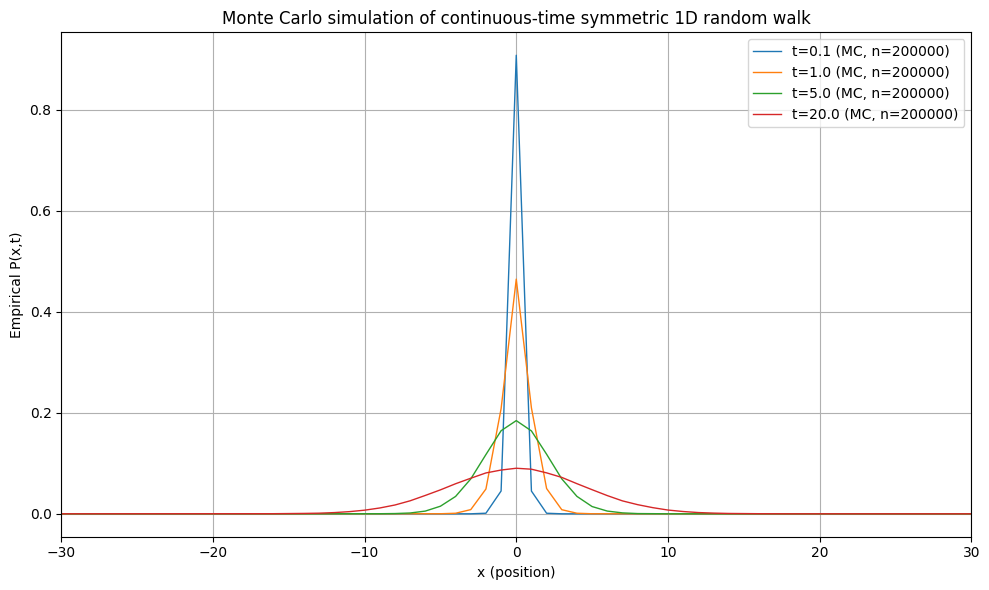

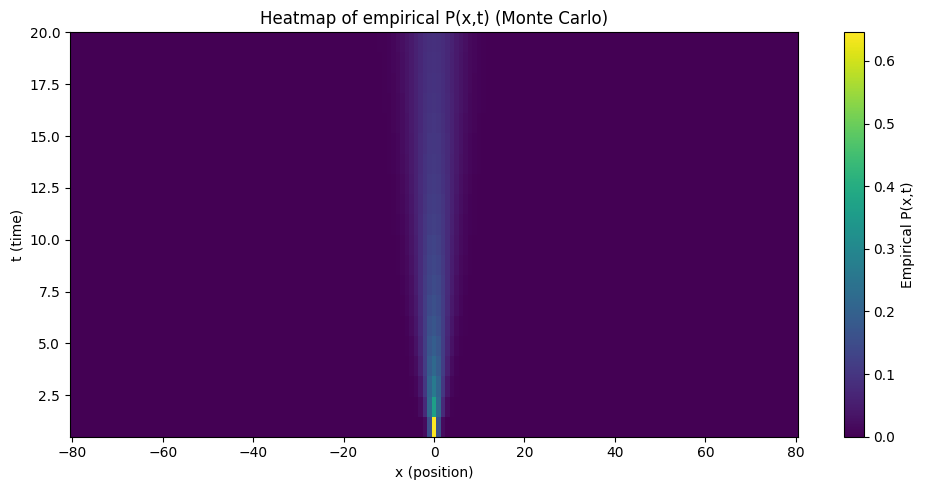

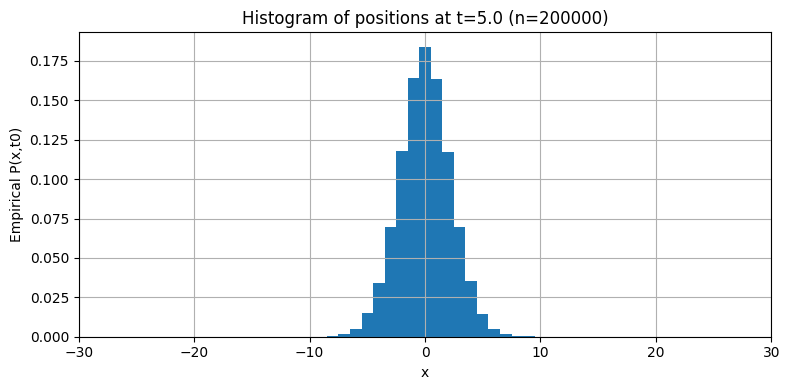

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from collections import Counter

np.random.seed(42)

def simulate_positions(n_trials, t):
    """
    n_trials 실험에서 시간 t일 때 위치 분포를 샘플링해서 정수 위치 배열 반환.
    모델: N ~ Poisson(t), 위치 X = sum_{i=1..N} s_i, s_i = ±1 iid (P=1/2)
    X = 2*B - N, where B ~ Binomial(N, 1/2)
    """
    # 각 실험마다 점프 수 N_i ~ Poisson(t)
    Ns = np.random.poisson(lam=t, size=n_trials)
    # B_i ~ Binomial(N_i, 0.5) (numpy은 배열 N에 대해 동작함)
    Bs = np.random.binomial(Ns, 0.5)
    Xs = 2 * Bs - Ns
    return Xs

def empirical_P(Xs, x_min=None, x_max=None):
    """
    Xs 샘플에서 경험적 확률 질량 함수 반환 (딕셔너리 또는 array)
    """
    cnt = Counter(Xs)
    if x_min is None: x_min = min(cnt)
    if x_max is None: x_max = max(cnt)
    xs = np.arange(x_min, x_max+1)
    probs = np.array([cnt.get(x, 0) for x in xs], dtype=float) / len(Xs)
    return xs, probs

# 설정
n_trials = 200_000      # 실험 수, 필요하면 늘리면 정확도 증가
times = [0.1, 1.0, 5.0, 20.0]
x_range = 80            # 시각화할 절대 x 범위 (절대값)

# 각 시간에 대해 시뮬레이션 및 플롯
plt.figure(figsize=(10,6))
for t in times:
    Xs = simulate_positions(n_trials, t)
    xs, probs = empirical_P(Xs, x_min=-x_range, x_max=x_range)
    plt.plot(xs, probs, label=f"t={t} (MC, n={n_trials})", linewidth=1)

plt.xlabel("x (position)")
plt.ylabel("Empirical P(x,t)")
plt.title("Monte Carlo simulation of continuous-time symmetric 1D random walk")
plt.xlim(-30, 30)
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()

# 히트맵: 여러 시간에 대해 위치분포(행: 시간, 열: x)
ts = np.linspace(0.5, 20, 20)
xs_full = np.arange(-x_range, x_range+1)
Pmat = np.zeros((len(ts), len(xs_full)))

for i, t in enumerate(ts):
    Xs = simulate_positions(n_trials, t)
    _, probs = empirical_P(Xs, x_min=-x_range, x_max=x_range)
    Pmat[i, :] = probs

plt.figure(figsize=(10,5))
extent = [xs_full[0]-0.5, xs_full[-1]+0.5, ts[0], ts[-1]]
plt.imshow(Pmat, aspect='auto', origin='lower', extent=extent)
plt.colorbar(label='Empirical P(x,t)')
plt.xlabel('x (position)')
plt.ylabel('t (time)')
plt.title('Heatmap of empirical P(x,t) (Monte Carlo)')
plt.tight_layout()
plt.show()

# (선택) 특정 t에서 샘플 분포 히스토그램을 보여주고 싶다면:
t0 = 5.0
Xs = simulate_positions(n_trials, t0)
plt.figure(figsize=(8,4))
plt.hist(Xs, bins=np.arange(-40,41)-0.5, density=True)
plt.xlabel('x')
plt.ylabel('Empirical P(x,t0)')
plt.title(f'Histogram of positions at t={t0} (n={n_trials})')
plt.xlim(-30,30)
plt.grid(True)
plt.tight_layout()
plt.show()
